In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import torch
from torchvision.transforms import ToTensor, Normalize
from dataset import SegmentationDataset
from models.vcn_32 import VCN32
import matplotlib.pyplot as plt

In [120]:
dataset = SegmentationDataset(root="data/stage1_train")

In [269]:
data = dataset[2]

In [270]:
img = data[0]
label = data[1]

In [271]:
x = ToTensor()(img).unsqueeze(0)
y = ToTensor()(label)[0, :].unsqueeze(0).long()

x.shape, y.shape

(torch.Size([1, 3, 256, 320]), torch.Size([1, 256, 320]))

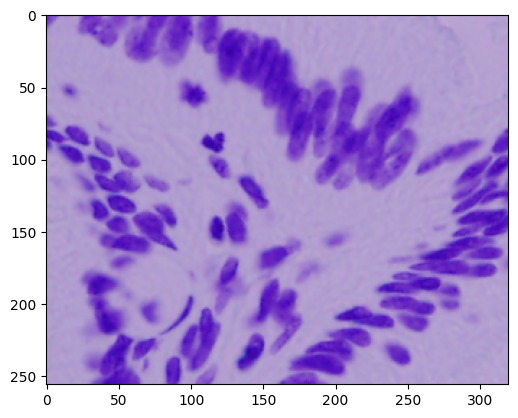

In [272]:
plt.imshow(x[0].permute(1, 2, 0))

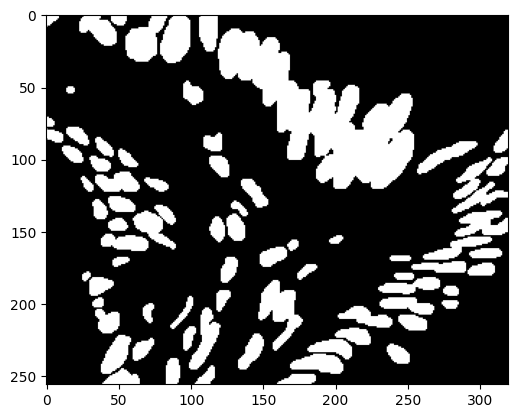

In [273]:
plt.imshow(y[0], cmap="gray")

# Training 1 Datapoint

In [274]:
device = torch.device("mps")

In [275]:
vcn32 = VCN32(num_classes=2).to(device)
model = vcn32

In [276]:
EPOCHS = 100
LR = 0.0003

cross_entropy = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(vcn32.parameters(), lr=LR, momentum=0.9)
optimizer = torch.optim.Adam(vcn32.parameters(), lr=LR)

In [291]:
x = x.to(device)
y = y.to(device)

for epoch in range(EPOCHS):
    pred = model(x)
    loss = cross_entropy(pred, y)
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"[Epoch {epoch+1}/{EPOCHS}]: Loss={loss.item()}")

[Epoch 1/100]: Loss=0.21621470153331757
[Epoch 2/100]: Loss=0.219044491648674
[Epoch 3/100]: Loss=0.22131016850471497
[Epoch 4/100]: Loss=0.21994245052337646
[Epoch 5/100]: Loss=0.21663065254688263
[Epoch 6/100]: Loss=0.21963989734649658
[Epoch 7/100]: Loss=0.24035917222499847
[Epoch 8/100]: Loss=0.21583831310272217
[Epoch 9/100]: Loss=0.22038030624389648
[Epoch 10/100]: Loss=0.21886630356311798
[Epoch 11/100]: Loss=0.23409782350063324
[Epoch 12/100]: Loss=0.2698065936565399
[Epoch 13/100]: Loss=0.21761952340602875
[Epoch 14/100]: Loss=0.2165776789188385
[Epoch 15/100]: Loss=0.2351761907339096
[Epoch 16/100]: Loss=0.25021275877952576
[Epoch 17/100]: Loss=0.2202058881521225
[Epoch 18/100]: Loss=0.22525088489055634
[Epoch 19/100]: Loss=0.21964769065380096
[Epoch 20/100]: Loss=0.21888403594493866
[Epoch 21/100]: Loss=0.21618299186229706
[Epoch 22/100]: Loss=0.2169470340013504
[Epoch 23/100]: Loss=0.22015328705310822
[Epoch 24/100]: Loss=0.21381115913391113
[Epoch 25/100]: Loss=0.217949017

In [292]:
pred.shape

torch.Size([1, 2, 256, 320])

In [293]:
predicted_class = torch.argmax(pred, dim=1)

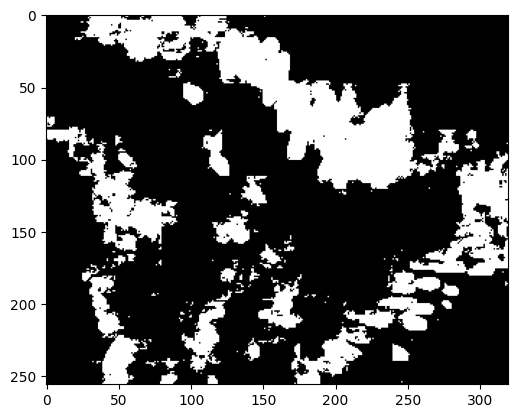

In [294]:
plt.imshow(predicted_class[0].cpu().detach().numpy(), cmap="gray")